<a href="https://colab.research.google.com/github/tohousanae/VGG16-CNN/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 載入cifar10數據集
from keras.datasets.cifar10 import load_data
(x_train,y_train),(x_test,y_test) = load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [2]:
x_train.shape

(50000, 32, 32, 3)

圖片:  飛機


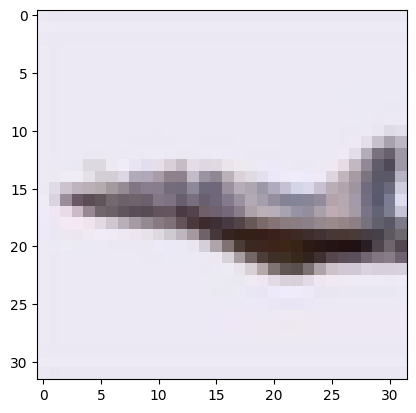

In [3]:
ans={0:"飛機",1:"汽車",2:"鳥",3:"貓",4:"鹿",5:"狗",6:"青蛙",7:"馬",8:"船",9:"卡車"}
import matplotlib.pyplot as plt
%matplotlib inline
import random
c=random.randint(0,49999)
print("圖片: ",ans[y_train[c][0]])
plt.imshow(x_train[c])

# 一、資料預處理

### 圖片資料處理: 原本資料值介於[0-255]，為了讓深度學習的效果更好必須處理成[0-1]之間，或[-1~1] (更佳)

### 答案資料處理: 必須使用[One-Hot Encoding]處理成機率陣列的形式

In [4]:
# 為何這裡不用[reshape]??因為後面的模型會把資料攤開成一維
xx_train = x_train / 255
xx_test = x_test / 255

In [5]:
from tensorflow.keras.utils import to_categorical
yy_train = to_categorical(y_train)
yy_test = to_categorical(y_test)
print("Demo:", yy_train[0])

Demo: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


# 二、建立模型

In [ ]:
# 建立模型主體
from keras.models import Sequential
cnn = Sequential()

In [ ]:
# 卷積層
from keras.layers import Conv2D,BatchNormalization
cnn.add(Conv2D(64, (3, 3),padding="same",input_shape = (32,32,3),activation="relu"))
# Batch Normalization正則化
cnn.add(BatchNormalization())
from keras.layers import Dropout
cnn.add(Conv2D(64, (3, 3),input_shape = (32,32,3),activation="relu"))
cnn.add(BatchNormalization())
# 池化層
from keras.layers import MaxPooling2D
MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid', data_format='channels_last', name='maxpool_layer')

In [ ]:
# 卷積層
cnn.add(Conv2D(128, (3, 3),activation="relu"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(128, (3, 3),activation="relu"))
cnn.add(BatchNormalization())
# 池化層
MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid', data_format='channels_last', name='maxpool_layer')

In [ ]:
# 卷積層
cnn.add(Conv2D(256, (3, 3),activation="relu"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(256, (3, 3),activation="relu"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(256, (3, 3),activation="relu"))
cnn.add(BatchNormalization())
# 池化層
MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid', data_format='channels_last', name='maxpool_layer')

In [ ]:
# 卷積層
cnn.add(Conv2D(512, (3, 3),activation="relu"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(512, (3, 3),activation="relu"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(512, (3, 3),activation="relu"))
cnn.add(BatchNormalization())
# 池化層
MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid', data_format='channels_last', name='maxpool_layer')

In [ ]:
# 卷積層
cnn.add(Conv2D(512, (3, 3),activation="relu"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(512, (3, 3),activation="relu"))
cnn.add(BatchNormalization())
cnn.add(Conv2D(512, (3, 3),activation="relu"))
cnn.add(BatchNormalization())
# 池化層
MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid', data_format='channels_last', name='maxpool_layer')

In [ ]:
# 將資料攤開成一維以便進行MLP
from keras.layers import Flatten
cnn.add(Flatten())

In [ ]:
# 建立MLP隱藏層
from keras.layers import Dense
cnn.add(Dense(4096, activation="relu"))
# 使用[Dropout]嘗試減少過擬合的狀況
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())

In [ ]:
# 建立MLP隱藏層
from keras.layers import Dense
cnn.add(Dense(4096, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())

In [ ]:
# 建立MLP隱藏層
from keras.layers import Dense
cnn.add(Dense(1000, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())

In [ ]:
# 建立MLP輸出層，要辨識的圖片有10種類別因此輸出層dense設10
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 64)        256       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_2 (Bat  (None, 28, 28, 128)       5

# 確立目標及求解方法

In [6]:
# (可選)使用已儲存的模型進行訓練
import tensorflow as tf
cnn = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/cifar10_cnn.h5.keras")

In [7]:
cnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

# 訓練模型

### 数据增强（Data Augmentation）： 数据增强技术可用于增加训练数据的多样性，以提高模型的泛化能力。常见的数据增强操作包括随机旋转、水平翻转、随机裁剪等。

In [8]:
# datagen.fit(xx_train) 的主要目的是計算用於數據增強的統計信息，例如平均值和標準差。通常，這個操作只需要在訓練開始前執行一次，而不需要在每個 epoch 開始時都執行。計算這些統計信息是一個比較耗時的過程，所以通常只需要執行一次。
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    # 指定旋转角度的范围，这会随机旋转图像。
    rotation_range=40,
    # 允许在水平和垂直方向上随机平移图像。
    width_shift_range=0.2,
    height_shift_range=0.2,
    # 允许随机剪切图像。
    shear_range=0.2,
    # 允许随机缩放图像。
    zoom_range=0.2,
    # 随机水平翻转图像。
    horizontal_flip=True,
    # 指定在图像变换后可能出现的像素填充方式。
    fill_mode='nearest')

datagen.fit(xx_train)

### 使用for迴圈在每個epoch使用datagen.flow打亂數據，強化模型泛化能力。

In [ ]:
# 使用数据生成器生成训练数据
batch_size = 32
epochs = 10
# cnn.fit(xx_train,yy_train,batch_size=32,epochs=20,validation_split=0.1)
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    # 重新生成一個新的增強數據生成器，以確保每個 epoch 使用不同的增強數據
    augmented_data_generator = datagen.flow(xx_train, yy_train, batch_size=batch_size)

    # 使用 fit 來訓練模型，並在每個 epoch 開始時使用新的增強數據生成器
    cnn.fit(augmented_data_generator, epochs=1, validation_data=(xx_test, yy_test))

Epoch 1/10
1563/1563 [==============================] - 216s 122ms/step - loss: 3.8146 - accuracy: 0.5821 - val_loss: 1.0185 - val_accuracy: 0.6707
Epoch 2/10
 623/1563 [==========>...................] - ETA: 1:49 - loss: 3.8361 - accuracy: 0.5877

# 評估模型

In [1]:
cnn.evaluate(xx_test, yy_test)

NameError: ignored

# 儲存模型

In [ ]:
cnn.save("cifar10_cnn.h5.keras")

# 察看錯誤

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy
#pre = cnn.predict_classes(xx_test)
pre = cnn.predict(xx_test)
pre = numpy.argmax(pre,axis=1)
pd.DataFrame(confusion_matrix(y_test, pre))

313/313 [==============================] - 2s 5ms/step


,0,1,2,3,4,5,6,7,8,9
0,824,20,14,10,3,1,4,13,50,61
1,4,893,0,1,1,0,0,1,1,99
2,33,3,686,48,23,55,66,44,7,35
3,10,6,28,679,18,130,32,27,19,51
4,7,2,26,37,723,20,70,97,5,13
5,1,2,20,74,13,812,13,32,2,31
6,5,4,10,49,6,11,873,11,2,29
7,4,1,6,17,7,25,9,902,1,28
8,53,24,5,5,2,1,2,4,853,51
9,9,26,0,3,0,0,3,0,3,956


In [ ]:
y_test.reshape(10000)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

到底有幾個預測錯誤: 1799


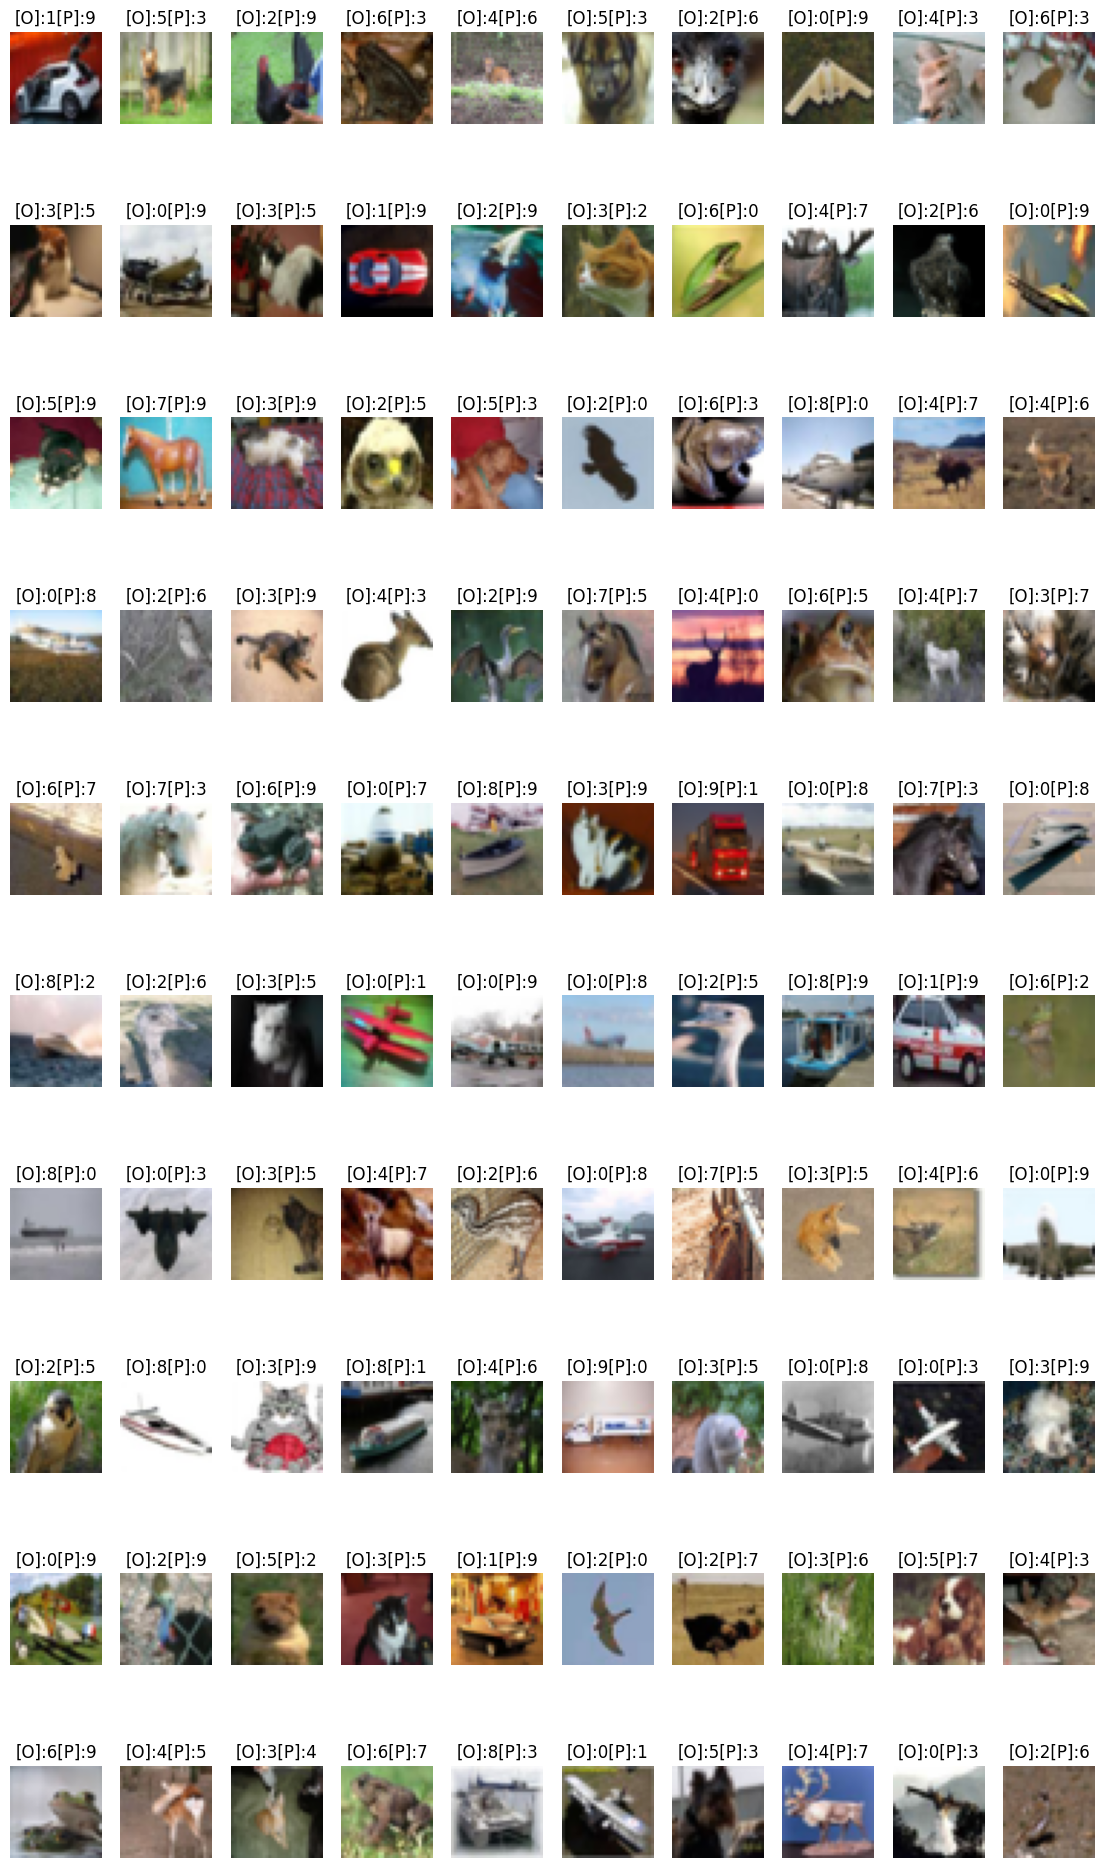

In [ ]:
import numpy as np
false_index = np.nonzero(pre != y_test.reshape(10000))[0]
print("到底有幾個預測錯誤:", len(false_index))
false_img = x_test[false_index]
ori_label = y_test[false_index]
pre_label = pre[false_index]

width = 10
height = int(len(false_index) / 10) + 1
plt.figure(figsize=(14, 450))
for (index, img) in enumerate(false_img[:100]):
    plt.subplot(height, width, index + 1)
    msg = "[O]:" + str(ori_label[index][0]) + "[P]:" + str(pre_label[index])
    plt.title(msg)
    plt.axis("off")
    plt.imshow(img)